In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directories for the training and validation sets
train_dir = 'split_1_Village/train'
val_dir = 'split_1_Village/val'

# Define the image size, batch size, and number of epochs
input_shape = (128, 128, 3)
img_size = (128, 128)
batch_size = 10
num_epochs = 50

# Define the data generators for the training and validation sets
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.1, height_shift_range=0.1,
    shear_range=0.1, zoom_range=0.1, horizontal_flip=True, fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=True)
val_generator = val_datagen.flow_from_directory(val_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=True)

# Define the CNN model with dropout and regularization
model = Sequential()

model.add(Conv2D(512, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dropout(0.25))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

2023-03-29 08:15:46.186563: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-29 08:15:47.320666: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-29 08:15:47.320739: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-29 08:15:47.320745: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

Found 4000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


2023-03-29 08:15:48.540956: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-29 08:15:48.604042: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-29 08:15:48.604639: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-29 08:15:48.605841: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 512)     14336     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 512)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 256)       1179904   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       295040    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [3]:
# Train the model
history = model.fit(train_generator, epochs=num_epochs, validation_data=val_generator)

Epoch 1/50


2023-03-29 08:15:57.288801: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8204
2023-03-29 08:16:00.840377: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fae84002a00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-29 08:16:00.840411: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2023-03-29 08:16:00.857389: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-29 08:16:01.014259: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


400/400 [==============================] - 50s 106ms/step - loss: 1.6520 - accuracy: 0.3695 - val_loss: 1.0917 - val_accuracy: 0.5700
Epoch 2/50
400/400 [==============================] - 42s 106ms/step - loss: 1.0862 - accuracy: 0.6110 - val_loss: 0.8006 - val_accuracy: 0.7820
Epoch 3/50
400/400 [==============================] - 42s 106ms/step - loss: 0.8716 - accuracy: 0.7253 - val_loss: 0.5140 - val_accuracy: 0.8620
Epoch 4/50
400/400 [==============================] - 42s 106ms/step - loss: 0.7223 - accuracy: 0.7742 - val_loss: 0.5502 - val_accuracy: 0.8260
Epoch 5/50
400/400 [==============================] - 42s 106ms/step - loss: 0.6393 - accuracy: 0.8140 - val_loss: 0.2940 - val_accuracy: 0.9380
Epoch 6/50
400/400 [==============================] - 42s 106ms/step - loss: 0.5827 - accuracy: 0.8367 - val_loss: 0.2740 - val_accuracy: 0.9380
Epoch 7/50
400/400 [==============================] - 42s 106ms/step - loss: 0.5120 - accuracy: 0.8670 - val_loss: 0.2738 - val_accuracy: 0.9

Text(0.5, 1.0, 'Training and Validation Loss')

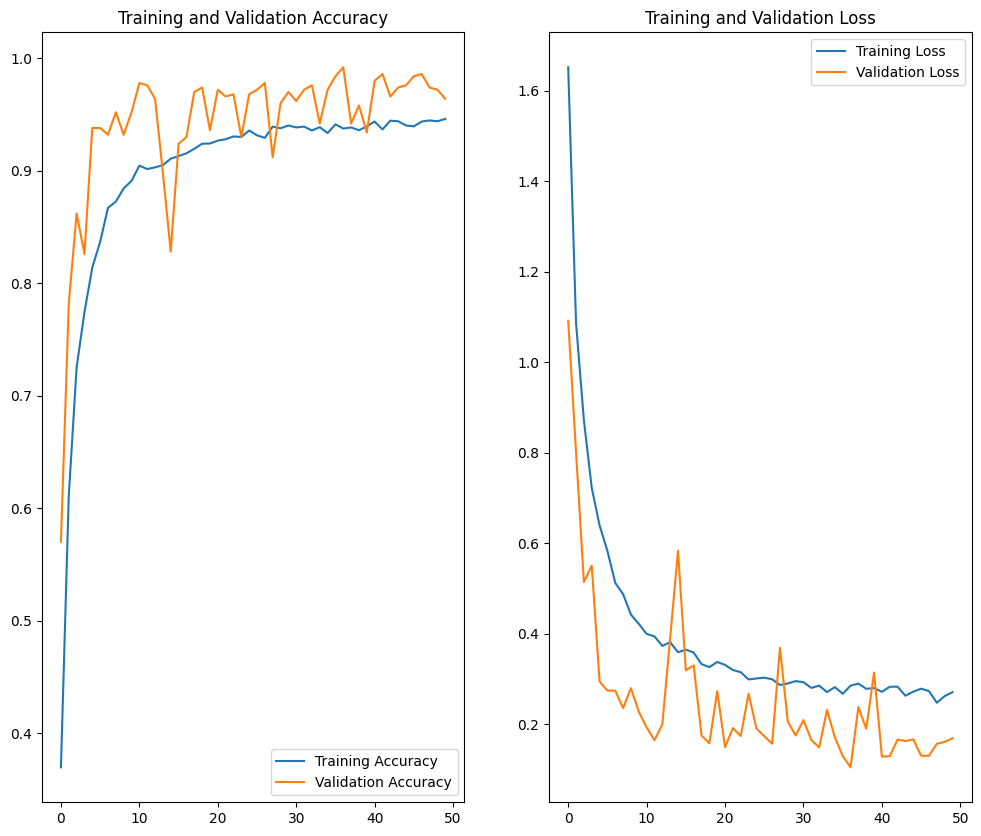

In [4]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12,10))
plt.subplot(121)
plt.plot(range(num_epochs), acc, label='Training Accuracy')
plt.plot(range(num_epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(122)
plt.plot(range(num_epochs), loss, label='Training Loss')
plt.plot(range(num_epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

Found 500 images belonging to 5 classes.
50/50 [==============================] - 2s 34ms/step
Test accuracy:95.20


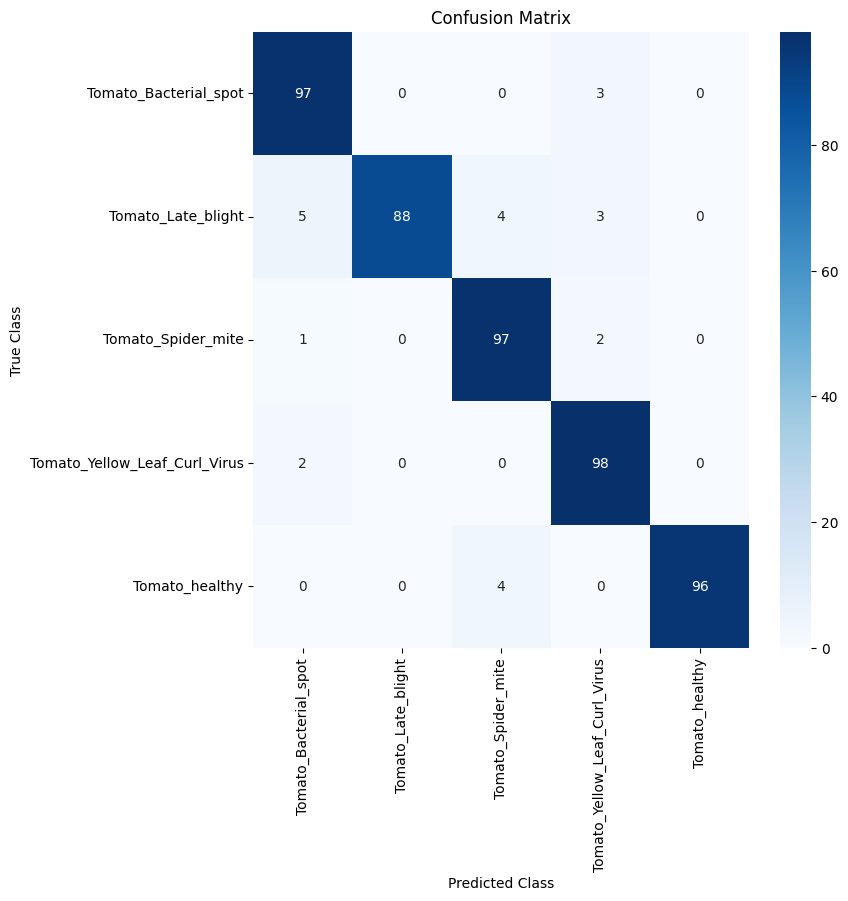

In [5]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import os

# Define the directory for the test set
test_dir = 'split_1_Village/test'

# Define the data generator for the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False)

# Use the trained model to make predictions on the test set
y_pred = model.predict(test_generator)
y_true = test_generator.classes

# Compute the test accuracy
test_acc = accuracy_score(y_true, np.argmax(y_pred, axis=1)) * 100
print(f'Test accuracy:{test_acc:.2f}')

# Generate the confusion matrix
cm = confusion_matrix(y_true, np.argmax(y_pred, axis=1))

# Define class names
class_names = sorted(os.listdir(train_dir))

# Plot the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(cm, cmap='Blues', annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


In [6]:
from sklearn.metrics import classification_report

# Get the predictions for the test set
y_pred = model.predict(test_generator)

# Get the class labels for the test set
y_true = test_generator.classes

# Get the class names for the test set
class_names = list(test_generator.class_indices.keys())

# Get the classification report
report = classification_report(y_true, np.argmax(y_pred, axis=1), target_names=class_names, digits=4)

# Print the classification report
print(report)

50/50 [==============================] - 2s 34ms/step
                               precision    recall  f1-score   support

        Tomato_Bacterial_spot     0.9238    0.9700    0.9463       100
           Tomato_Late_blight     1.0000    0.8800    0.9362       100
           Tomato_Spider_mite     0.9238    0.9700    0.9463       100
Tomato_Yellow_Leaf_Curl_Virus     0.9245    0.9800    0.9515       100
               Tomato_healthy     1.0000    0.9600    0.9796       100

                     accuracy                         0.9520       500
                    macro avg     0.9544    0.9520    0.9520       500
                 weighted avg     0.9544    0.9520    0.9520       500



In [7]:
# from sklearn.metrics import classification_report, confusion_matrix
# import seaborn as sns

# def predictor(test_gen, test_steps):
#     y_pred= []
#     y_true=test_gen.classes
#     classes=list(test_gen.class_indices.keys())
#     class_count=len(classes)
#     errors=0
#     preds=model.predict(test_gen, verbose=1)
#     tests=len(preds)    
#     for i, p in enumerate(preds):        
#         pred_index=np.argmax(p)         
#         true_index=test_gen.classes[i]  # classNames are integer values        
#         if pred_index != true_index: # a misclassification has occurred                                           
#             errors=errors + 1
#         y_pred.append(pred_index)
            
#     acc=( 1-errors/tests) * 100 
#     print(f'there were {errors} errors in {tests} tests for an accuracy of {acc:6.2f}')
#     ypred=np.array(y_pred)
#     ytrue=np.array(y_true)
#     if class_count <= 5:
#         cm = confusion_matrix(ytrue, ypred )
#         # plot the confusion matrix
#         plt.figure(figsize=(8, 8))
#         sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
#         plt.xticks(np.arange(class_count)+.5, classes, rotation=90)
#         plt.yticks(np.arange(class_count)+.5, classes, rotation=0)
#         plt.xlabel("Predicted")
#         plt.ylabel("Actual")
#         plt.title("Confusion Matrix")
#         plt.show()
#     clr = classification_report(y_true, y_pred, target_names=classes, digits= 4) # create classification report
#     print("Classification Report:\n----------------------\n", clr)
#     return errors, tests
# errors, tests=predictor(test_generator, 500)